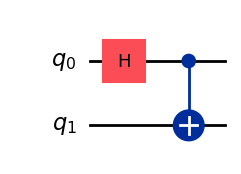

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

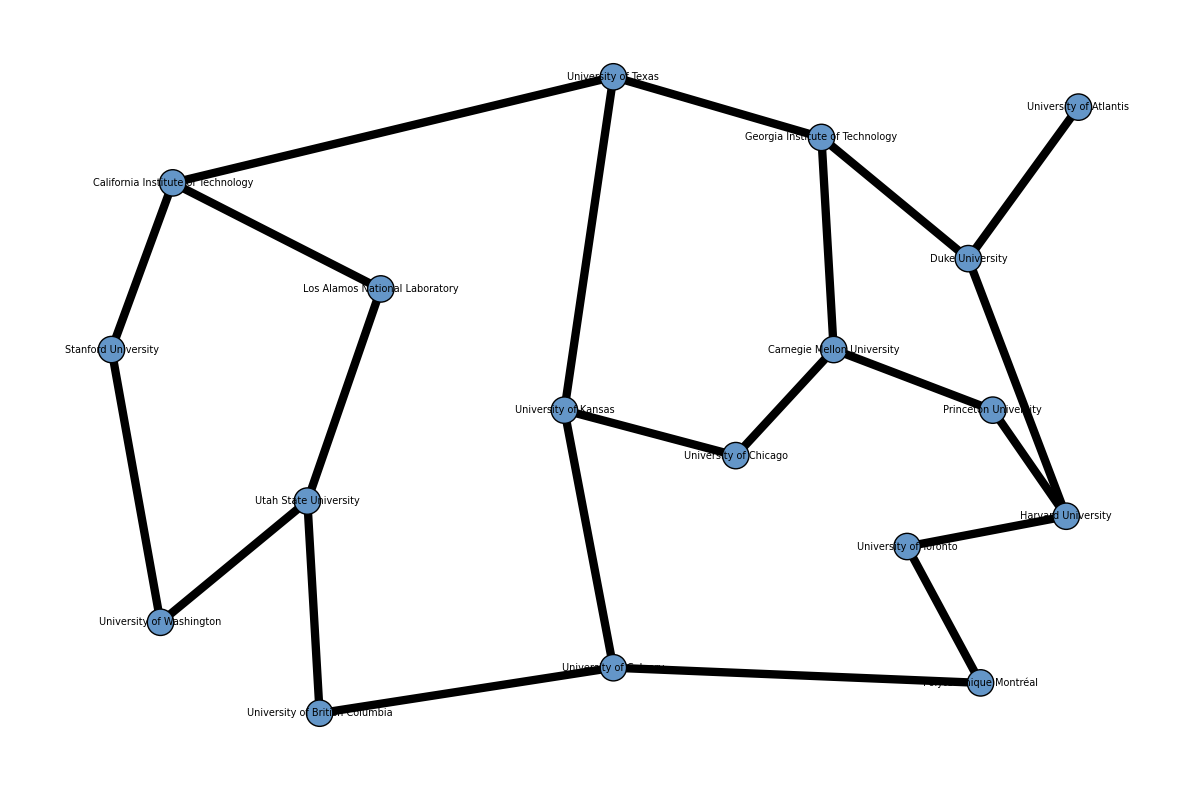

In [6]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 1) Load the map data from JSON file
with open("config/university_map.json", "r", encoding="utf-8") as f:
    data = json.load(f)

unis   = data["universities"]
routes = data["routes"]

# 2) Create the graph and add all university nodes
G = nx.Graph()
for key, info in unis.items():
    G.add_node(
        key,
        label=info["name"],
        pos=tuple(info["position"]),
        color=tuple(c/255 for c in info["color"])
    )

# 3) Add all the routes as edges
for r in routes:
    frm = r["from"]
    to  = r["to"]
    G.add_edge(frm, to, length=r.get("length", 1), gate=r.get("gate", []))

# 4) Prepare drawing parameters
pos   = nx.get_node_attributes(G, "pos")
colors = [G.nodes[n]["color"] for n in G.nodes()]

# 5) Draw graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos,
                       node_color=colors,
                       node_size=data["map_settings"]["university_radius"]*20,
                       edgecolors="black")
nx.draw_networkx_labels(G, pos,
                        labels=nx.get_node_attributes(G, "label"),
                        font_size=data["map_settings"]["font_size"]//3)
nx.draw_networkx_edges(G, pos,
                       width=data["map_settings"]["route_width"]//2)

plt.axis("off")
plt.tight_layout()
plt.show()
